### Import

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras import models
from keras import layers
import keras
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sb
import tensorflow as tf

### Data

Let's load the IMDb dataset, which is already built into Keras. Since we do not want to have training and testing data in a 50/50 proportion, we will combine this data after loading for division in an 80/20 proportion.

The dataset is represented as 50,000 movie reviews, marked as 1 or 0 for positive or negative, respectively. The words in the dataset are numbered by the frequency of occurrence in the test set, the num_words parameter of the imdb.load_data function allows you to select the cutoff frequency.

In [2]:
data_num = 10000

In [3]:
from keras.datasets import imdb

(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=data_num)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

In [4]:
data.shape

(50000,)

### Data preparation

For data preparation we need to vectorize each review and fill it with zeros so that the vector contains exactly 10,000 numbers. This means that we fill in every overview that is shorter than 10,000 words with zeros, because the dictionary contains approximately that number of words. It is also needed to convert the variables to float type.

In [5]:
def vectorize(sequences, dimension):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  results[i, sequence] = 1
 return results

In [6]:
data_vec = vectorize(data, 10000)
targets = np.array(targets).astype("float32")

Let's divide the dataset into training and testing sets. The training set will consist of 40,000 reviews, and the test set will contain 10,000.

In [7]:
test_x = data_vec[:10000]
test_y = targets[:10000]
train_x = data_vec[10000:50000]
train_y = targets[10000:50000]


### Model creation and training

Now we can create a simple neural network. Let's start by defining the type of model we want to create. There are two types of models available in Keras: sequential and functional API. Then we need to add input, hidden and output layers. To prevent overfitting, we will use dropout in the range from 20% to 50%. We use the “relu” activation function, because this almost always leads to satisfactory results. On the output layer, we use a sigmoid function that renormalizes values ​​in the range from 0 to 1. The input layer accepts elements with a size of 10,000, and outputs them with a size of 50.

In [ ]:
model_1 = models.Sequential()

In [ ]:
# Input - Layer
model_1.add(layers.Dense(64, activation = "relu", input_shape=(10000, )))
model_1.add(layers.Dense(32, activation = "relu"))
# Output- Layer
model_1.add(layers.Dense(1, activation = "sigmoid"))
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 642,177
Trainable params: 642,177
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [8]:
early_stop_val_loss_callback = tf.keras.callbacks.EarlyStopping(patience=5,monitor='val_loss')
reduce_lr_callback_depends_on_val_loss = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=2, verbose=1, mode='auto',
    min_delta=0.0001, cooldown=0, min_lr=0.00001)

In [ ]:
results = model_1.fit(
 train_x, train_y,
 epochs=10,
 batch_size = 32,
 validation_split = 0.2,
 callbacks = [early_stop_val_loss_callback,
            reduce_lr_callback_depends_on_val_loss])

Epoch 1/10
1000/1000 [==============================] - 6s 5ms/step - loss: 0.3136 - accuracy: 0.8676 - val_loss: 0.2535 - val_accuracy: 0.9005 - lr: 0.0010
Epoch 2/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1753 - accuracy: 0.9301 - val_loss: 0.2842 - val_accuracy: 0.8832 - lr: 0.0010
Epoch 3/10
1000/1000 [==============================] - ETA: 0s - loss: 0.0837 - accuracy: 0.9690
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0837 - accuracy: 0.9690 - val_loss: 0.3872 - val_accuracy: 0.8874 - lr: 0.0010
Epoch 4/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0188 - accuracy: 0.9947 - val_loss: 0.4918 - val_accuracy: 0.8911 - lr: 5.0000e-04
Epoch 5/10
 987/1000 [============================>.] - ETA: 0s - loss: 0.0041 - accuracy: 0.9991
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
1000/1000 [============

In [ ]:
model_1.evaluate(test_x, test_y)

313/313 [==============================] - 3s 8ms/step - loss: 0.7329 - accuracy: 0.8811


[0.7329350709915161, 0.8810999989509583]

In [9]:
def plot_history(history):
  fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
  
  # summarize history for accuracy
  axis1.plot(history.history['accuracy'], label='Train', linewidth=3)
  axis1.plot(history.history['val_accuracy'], label='Validation', linewidth=3)
  axis1.set_title('Model accuracy', fontsize=16)
  axis1.set_ylabel('accuracy')
  axis1.set_xlabel('epoch')
  axis1.legend(loc='upper left')
  
  # summarize history for loss
  axis2.plot(history.history['loss'], label='Train', linewidth=3)
  axis2.plot(history.history['val_loss'], label='Validation', linewidth=3)
  axis2.set_title('Model loss', fontsize=16)
  axis2.set_ylabel('loss')
  axis2.set_xlabel('epoch')
  axis2.legend(loc='upper right')
  plt.show()

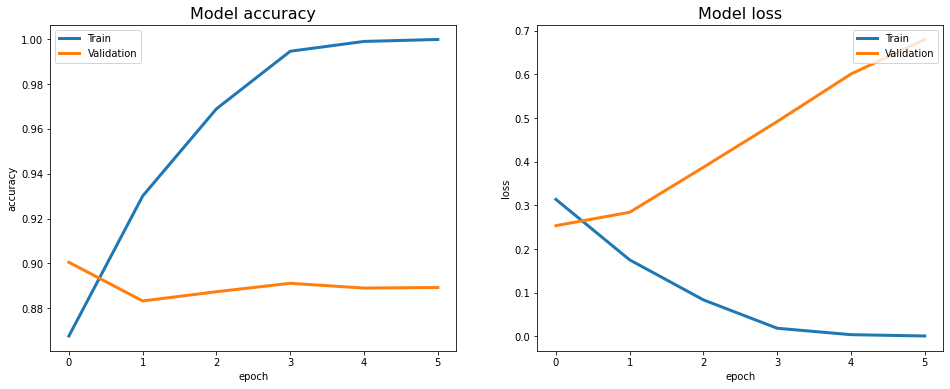

In [ ]:
plot_history(results)

### Confusion_matrix

In [ ]:
def plot_confusion_matrix(y_true, y_pred, ax, class_names, title='Confusion matrix'):
    matrix = confusion_matrix(y_true,y_pred)
    matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    sb.heatmap(matrix, annot=True, square=True, ax=ax,
               cmap=plt.cm.Blues_r, cbar=False, linecolor='black',
               linewidths=1, xticklabels=class_names)
    ax.set_title(title, y=1.20, fontsize=10)
    ax.set_ylabel('True labels', fontsize=12)
    ax.set_xlabel('Predicted labels', y=1.10, fontsize=12)
    ax.set_yticklabels(class_names, rotation=0)

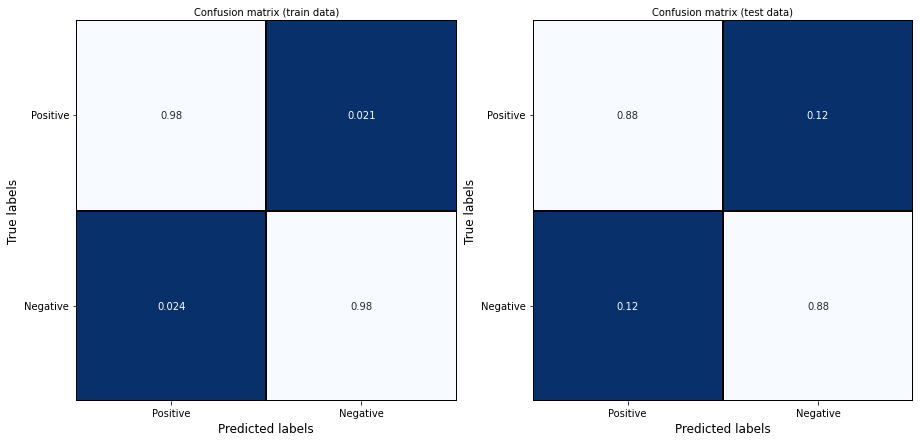

In [ ]:
y_train_pred = model_1.predict(train_x)
y_train_pred_bin = [1 if i > 0.5 else 0 for i in y_train_pred]
y_test_pred = model_1.predict(test_x)
y_test_pred_bin = [1 if i > 0.5 else 0 for i in y_test_pred]
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize = (15, 15))
plot_confusion_matrix(train_y, y_train_pred_bin, ax=axis1,
                      title='Confusion matrix (train data)',
                      class_names=['Positive', 'Negative'])
plot_confusion_matrix(test_y, y_test_pred_bin, ax=axis2,
                      title='Confusion matrix (test data)',
                      class_names=['Positive', 'Negative'])

### Model 2

In [19]:
model_2 = models.Sequential()

In [20]:
# Input - Layer
model_2.add(layers.Dense(64, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model_2.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model_2.add(layers.Dense(32, activation = "relu"))
model_2.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model_2.add(layers.Dense(16, activation = "relu"))
model_2.add(layers.Dropout(0.4, noise_shape=None, seed=None))
# Output- Layer
model_2.add(layers.Dense(1, activation = "sigmoid"))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                640064    
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
model_2.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [ ]:
results = model_2.fit(
 train_x, train_y,
 epochs=10,
 batch_size = 32,
 validation_split = 0.2,
 callbacks = [early_stop_val_loss_callback,
              reduce_lr_callback_depends_on_val_loss]
      )

Epoch 1/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.3569 - accuracy: 0.8508 - val_loss: 0.2712 - val_accuracy: 0.8891 - lr: 0.0010
Epoch 2/10
1000/1000 [==============================] - 8s 8ms/step - loss: 0.2144 - accuracy: 0.9194 - val_loss: 0.2712 - val_accuracy: 0.8935 - lr: 0.0010
Epoch 3/10
 998/1000 [============================>.] - ETA: 0s - loss: 0.1447 - accuracy: 0.9483
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1448 - accuracy: 0.9482 - val_loss: 0.2963 - val_accuracy: 0.8901 - lr: 0.0010
Epoch 4/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0718 - accuracy: 0.9782 - val_loss: 0.4430 - val_accuracy: 0.8904 - lr: 5.0000e-04
Epoch 5/10
 990/1000 [============================>.] - ETA: 0s - loss: 0.0413 - accuracy: 0.9880
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
1000/1000 [============

In [ ]:
model_2.evaluate(test_x, test_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.6997 - accuracy: 0.8841


[0.6997092366218567, 0.8841000199317932]

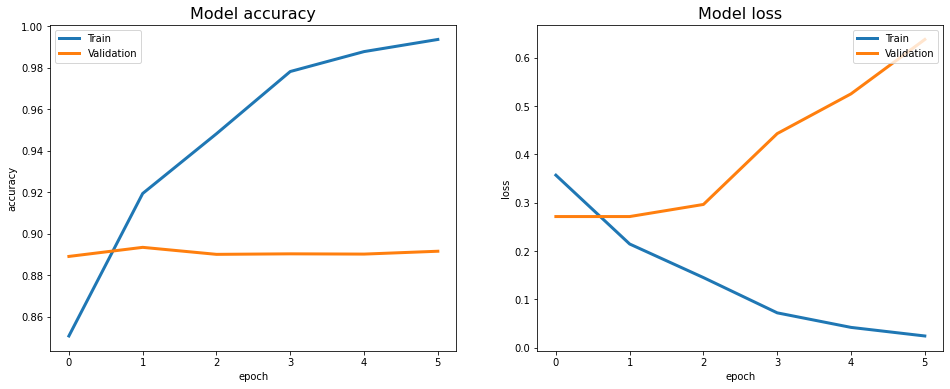

In [ ]:
plot_history(results)

### Confusion_matrix

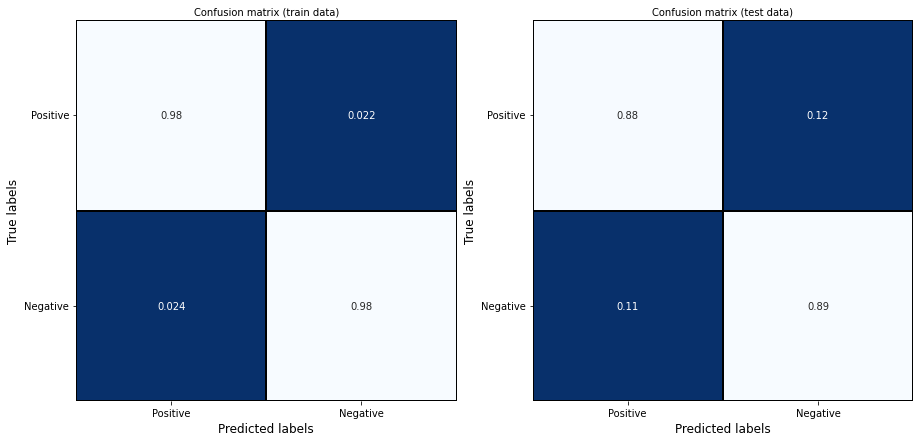

In [ ]:
y_train_pred = model_2.predict(train_x)
y_train_pred_bin = [1 if i > 0.5 else 0 for i in y_train_pred]
y_test_pred = model_2.predict(test_x)
y_test_pred_bin = [1 if i > 0.5 else 0 for i in y_test_pred]
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize = (15, 15))
plot_confusion_matrix(train_y, y_train_pred_bin, ax=axis1,
                      title='Confusion matrix (train data)',
                      class_names=['Positive', 'Negative'])
plot_confusion_matrix(test_y, y_test_pred_bin, ax=axis2,
                      title='Confusion matrix (test data)',
                      class_names=['Positive', 'Negative'])

Optimizer = SGD

In [ ]:
model_2.compile(
 optimizer = "SGD",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [ ]:
results = model_2.fit(
 train_x, train_y,
 epochs=10,
 batch_size = 32,
 validation_split = 0.2,
 callbacks = [early_stop_val_loss_callback,
              reduce_lr_callback_depends_on_val_loss]
      )

Epoch 1/10
1000/1000 [==============================] - 6s 5ms/step - loss: 0.5992 - accuracy: 0.6722 - val_loss: 0.4092 - val_accuracy: 0.8446 - lr: 0.0100
Epoch 2/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.4067 - accuracy: 0.8309 - val_loss: 0.3003 - val_accuracy: 0.8832 - lr: 0.0100
Epoch 3/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.3399 - accuracy: 0.8721 - val_loss: 0.2711 - val_accuracy: 0.8909 - lr: 0.0100
Epoch 4/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.2964 - accuracy: 0.8898 - val_loss: 0.2645 - val_accuracy: 0.8942 - lr: 0.0100
Epoch 5/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.2620 - accuracy: 0.9062 - val_loss: 0.2581 - val_accuracy: 0.8946 - lr: 0.0100
Epoch 6/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.2381 - accuracy: 0.9162 - val_loss: 0.2726 - val_accuracy: 0.8869 - lr: 0.0100
Epoch 7/10
 988/1000 [============================>.] - ET

In [ ]:
model_2.evaluate(test_x, test_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.2963 - accuracy: 0.8902


[0.29627159237861633, 0.8902000188827515]

RMS prop

In [ ]:
model_2.compile(
 optimizer = "RMSprop",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [ ]:
results = model_2.fit(
 train_x, train_y,
 epochs=10,
 batch_size = 32,
 validation_split = 0.2,
 callbacks = [early_stop_val_loss_callback,
              reduce_lr_callback_depends_on_val_loss]
      )

Epoch 1/10
1000/1000 [==============================] - 7s 6ms/step - loss: 0.3678 - accuracy: 0.8535 - val_loss: 0.2523 - val_accuracy: 0.9010 - lr: 0.0010
Epoch 2/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.2514 - accuracy: 0.9114 - val_loss: 0.2777 - val_accuracy: 0.8898 - lr: 0.0010
Epoch 3/10
 994/1000 [============================>.] - ETA: 0s - loss: 0.2219 - accuracy: 0.9246
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1000/1000 [==============================] - 6s 6ms/step - loss: 0.2219 - accuracy: 0.9245 - val_loss: 0.2668 - val_accuracy: 0.9020 - lr: 0.0010
Epoch 4/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1857 - accuracy: 0.9394 - val_loss: 0.2960 - val_accuracy: 0.9013 - lr: 5.0000e-04
Epoch 5/10
 991/1000 [============================>.] - ETA: 0s - loss: 0.1729 - accuracy: 0.9466
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
1000/1000 [============

In [ ]:
model_2.evaluate(test_x, test_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.3862 - accuracy: 0.8948


[0.38623660802841187, 0.8948000073432922]

Batch_size = 128

In [ ]:
model_2.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [ ]:
results = model_2.fit(
 train_x, train_y,
 epochs=10,
 batch_size = 128,
 validation_split = 0.2,
 callbacks = [early_stop_val_loss_callback,
              reduce_lr_callback_depends_on_val_loss]
      )

Epoch 1/10
250/250 [==============================] - 3s 9ms/step - loss: 0.0259 - accuracy: 0.9923 - val_loss: 0.8395 - val_accuracy: 0.8894 - lr: 0.0010
Epoch 2/10
250/250 [==============================] - 2s 6ms/step - loss: 0.0247 - accuracy: 0.9935 - val_loss: 0.8664 - val_accuracy: 0.8840 - lr: 0.0010
Epoch 3/10
244/250 [============================>.] - ETA: 0s - loss: 0.0172 - accuracy: 0.9947
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
250/250 [==============================] - 2s 7ms/step - loss: 0.0172 - accuracy: 0.9948 - val_loss: 0.9797 - val_accuracy: 0.8874 - lr: 0.0010
Epoch 4/10
250/250 [==============================] - 2s 6ms/step - loss: 0.0145 - accuracy: 0.9958 - val_loss: 1.0314 - val_accuracy: 0.8859 - lr: 5.0000e-04
Epoch 5/10
241/250 [===========================>..] - ETA: 0s - loss: 0.0117 - accuracy: 0.9962
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
250/250 [==========================

In [ ]:
model_2.evaluate(test_x, test_y)

313/313 [==============================] - 1s 4ms/step - loss: 1.2436 - accuracy: 0.8786


[1.2436144351959229, 0.878600001335144]

Batch_size = 8

In [ ]:
model_2.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [ ]:
results = model_2.fit(
 train_x, train_y,
 epochs=10,
 batch_size = 8,
 validation_split = 0.2,
 callbacks = [early_stop_val_loss_callback,
              reduce_lr_callback_depends_on_val_loss]
      )

Epoch 1/10
4000/4000 [==============================] - 18s 4ms/step - loss: 0.3534 - accuracy: 0.8555 - val_loss: 0.2580 - val_accuracy: 0.8941 - lr: 0.0010
Epoch 2/10
4000/4000 [==============================] - 16s 4ms/step - loss: 0.2270 - accuracy: 0.9157 - val_loss: 0.2701 - val_accuracy: 0.8932 - lr: 0.0010
Epoch 3/10
3993/4000 [============================>.] - ETA: 0s - loss: 0.1556 - accuracy: 0.9449
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
4000/4000 [==============================] - 17s 4ms/step - loss: 0.1555 - accuracy: 0.9449 - val_loss: 0.3092 - val_accuracy: 0.8910 - lr: 0.0010
Epoch 4/10
4000/4000 [==============================] - 17s 4ms/step - loss: 0.0822 - accuracy: 0.9742 - val_loss: 0.4646 - val_accuracy: 0.8935 - lr: 5.0000e-04
Epoch 5/10
3992/4000 [============================>.] - ETA: 0s - loss: 0.0483 - accuracy: 0.9855
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
4000/4000 [========

In [ ]:
model_2.evaluate(test_x, test_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.8219 - accuracy: 0.8814


[0.8218934535980225, 0.8813999891281128]

Activation softmax

In [ ]:
model_2 = models.Sequential()
# Input - Layer
model_2.add(layers.Dense(64, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model_2.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model_2.add(layers.Dense(32, activation = "relu"))
model_2.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model_2.add(layers.Dense(16, activation = "relu"))
model_2.add(layers.Dropout(0.4, noise_shape=None, seed=None))
# Output- Layer
model_2.add(layers.Dense(1, activation = "softmax"))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                640064    
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
model_2.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [ ]:
results = model_2.fit(
 train_x, train_y,
 epochs=10,
 batch_size = 32,
 validation_split = 0.2,
 callbacks = [early_stop_val_loss_callback,
              reduce_lr_callback_depends_on_val_loss]
      )

Epoch 1/10
1000/1000 [==============================] - 6s 5ms/step - loss: 0.3576 - accuracy: 0.4965 - val_loss: 0.2556 - val_accuracy: 0.5075 - lr: 0.0010
Epoch 2/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.2141 - accuracy: 0.4965 - val_loss: 0.2685 - val_accuracy: 0.5075 - lr: 0.0010
Epoch 3/10
 997/1000 [============================>.] - ETA: 0s - loss: 0.1470 - accuracy: 0.4966
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1470 - accuracy: 0.4965 - val_loss: 0.3078 - val_accuracy: 0.5075 - lr: 0.0010
Epoch 4/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0704 - accuracy: 0.4965 - val_loss: 0.4048 - val_accuracy: 0.5075 - lr: 5.0000e-04
Epoch 5/10
 999/1000 [============================>.] - ETA: 0s - loss: 0.0415 - accuracy: 0.4964
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
1000/1000 [============

In [ ]:
model_2.evaluate(test_x, test_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.6887 - accuracy: 0.5053


[0.68873530626297, 0.505299985408783]

activation = tanh

In [ ]:
model_2 = models.Sequential()
# Input - Layer
model_2.add(layers.Dense(64, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model_2.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model_2.add(layers.Dense(32, activation = "relu"))
model_2.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model_2.add(layers.Dense(16, activation = "relu"))
model_2.add(layers.Dropout(0.4, noise_shape=None, seed=None))
# Output- Layer
model_2.add(layers.Dense(1, activation = "tanh"))
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640064    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [ ]:
model_2.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [ ]:
results = model_2.fit(
 train_x, train_y,
 epochs=10,
 batch_size = 32,
 validation_split = 0.2,
 callbacks = [early_stop_val_loss_callback,
              reduce_lr_callback_depends_on_val_loss]
      )

Epoch 1/10
1000/1000 [==============================] - 9s 7ms/step - loss: 0.4922 - accuracy: 0.8107 - val_loss: 0.2734 - val_accuracy: 0.8889 - lr: 0.0010
Epoch 2/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.2890 - accuracy: 0.9076 - val_loss: 0.3001 - val_accuracy: 0.8886 - lr: 0.0010
Epoch 3/10
 990/1000 [============================>.] - ETA: 0s - loss: 0.2440 - accuracy: 0.9308
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1000/1000 [==============================] - 7s 7ms/step - loss: 0.2433 - accuracy: 0.9308 - val_loss: 0.4019 - val_accuracy: 0.8928 - lr: 0.0010
Epoch 4/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1685 - accuracy: 0.9623 - val_loss: 0.5419 - val_accuracy: 0.8875 - lr: 5.0000e-04
Epoch 5/10
 998/1000 [============================>.] - ETA: 0s - loss: 0.1265 - accuracy: 0.9770
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
1000/1000 [============

In [ ]:
model_2.evaluate(test_x, test_y)

313/313 [==============================] - 2s 7ms/step - loss: 0.8483 - accuracy: 0.8812


[0.8482945561408997, 0.8812000155448914]

Learning rate = 0.01

In [19]:
model_2.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [14]:
from keras import backend as K
K.set_value(model_2.optimizer.learning_rate, 0.01)

In [21]:
results = model_2.fit(
 train_x, train_y,
 epochs=20,
 batch_size = 32,
 validation_split = 0.2,
 callbacks = [early_stop_val_loss_callback,
              reduce_lr_callback_depends_on_val_loss]
      )

Epoch 1/20
1000/1000 [==============================] - 6s 5ms/step - loss: 0.3761 - accuracy: 0.8454 - val_loss: 0.2629 - val_accuracy: 0.8934 - lr: 0.0100
Epoch 2/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.2571 - accuracy: 0.9043 - val_loss: 0.2749 - val_accuracy: 0.8900 - lr: 0.0100
Epoch 3/20
 997/1000 [============================>.] - ETA: 0s - loss: 0.2072 - accuracy: 0.9216
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
1000/1000 [==============================] - 4s 4ms/step - loss: 0.2072 - accuracy: 0.9216 - val_loss: 0.2907 - val_accuracy: 0.8924 - lr: 0.0100
Epoch 4/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.1479 - accuracy: 0.9491 - val_loss: 0.3916 - val_accuracy: 0.8856 - lr: 0.0050
Epoch 5/20
 994/1000 [============================>.] - ETA: 0s - loss: 0.1128 - accuracy: 0.9605
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0024999999441206455.
1000/1000 [=================

In [22]:
model_2.evaluate(test_x, test_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.5646 - accuracy: 0.8833


[0.564601719379425, 0.8833000063896179]

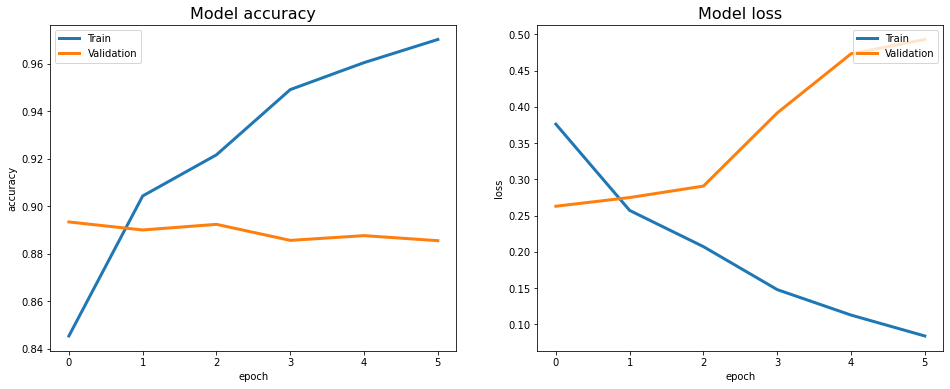

In [23]:
plot_history(results)

Learning rate = 0.0001

In [13]:
model_2.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [15]:
K.set_value(model_2.optimizer.learning_rate, 0.0001)

In [16]:
results = model_2.fit(
 train_x, train_y,
 epochs=20,
 batch_size = 32,
 validation_split = 0.2,
 callbacks = [early_stop_val_loss_callback,
              reduce_lr_callback_depends_on_val_loss]
      )

Epoch 1/20
1000/1000 [==============================] - 6s 5ms/step - loss: 0.5085 - accuracy: 0.7583 - val_loss: 0.2936 - val_accuracy: 0.8947 - lr: 1.0000e-04
Epoch 2/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.3002 - accuracy: 0.8913 - val_loss: 0.2534 - val_accuracy: 0.9010 - lr: 1.0000e-04
Epoch 3/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.2341 - accuracy: 0.9193 - val_loss: 0.2537 - val_accuracy: 0.8979 - lr: 1.0000e-04
Epoch 4/20
 999/1000 [============================>.] - ETA: 0s - loss: 0.1940 - accuracy: 0.9341
Epoch 00004: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1939 - accuracy: 0.9342 - val_loss: 0.2609 - val_accuracy: 0.9003 - lr: 1.0000e-04
Epoch 5/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1487 - accuracy: 0.9534 - val_loss: 0.2769 - val_accuracy: 0.9003 - lr: 5.0000e-05
Epoch 6/20
 992/1000 [======

In [17]:
model_2.evaluate(test_x, test_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.3259 - accuracy: 0.8900


[0.3258989155292511, 0.8899999856948853]

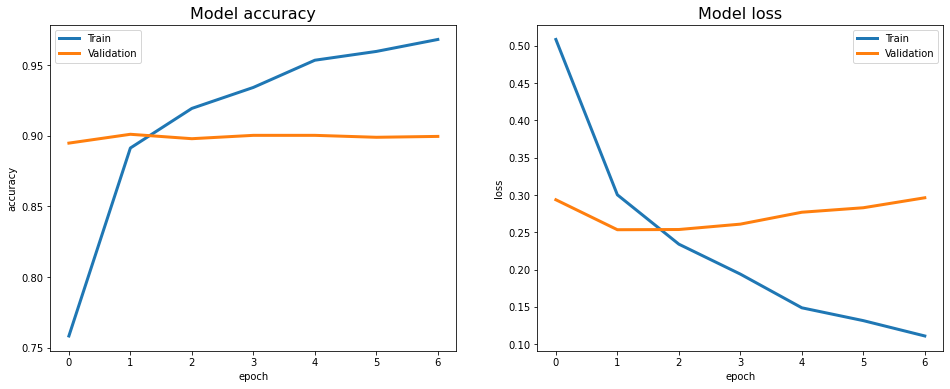

In [18]:
plot_history(results)

Learning rate = 0.00001

In [21]:
model_2.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [22]:
K.set_value(model_2.optimizer.learning_rate, 0.00001)

In [23]:
results = model_2.fit(
 train_x, train_y,
 epochs=20,
 batch_size = 32,
 validation_split = 0.2,
 callbacks = [early_stop_val_loss_callback,
              reduce_lr_callback_depends_on_val_loss]
      )

Epoch 1/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.6899 - accuracy: 0.5296 - val_loss: 0.6826 - val_accuracy: 0.6111 - lr: 1.0000e-05
Epoch 2/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6709 - accuracy: 0.6089 - val_loss: 0.6453 - val_accuracy: 0.7444 - lr: 1.0000e-05
Epoch 3/20
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6320 - accuracy: 0.6862 - val_loss: 0.5880 - val_accuracy: 0.8221 - lr: 1.0000e-05
Epoch 4/20
1000/1000 [==============================] - 5s 5ms/step - loss: 0.5837 - accuracy: 0.7339 - val_loss: 0.5275 - val_accuracy: 0.8512 - lr: 1.0000e-05
Epoch 5/20
1000/1000 [==============================] - 6s 6ms/step - loss: 0.5368 - accuracy: 0.7688 - val_loss: 0.4716 - val_accuracy: 0.8654 - lr: 1.0000e-05
Epoch 6/20
1000/1000 [==============================] - 6s 6ms/step - loss: 0.4947 - accuracy: 0.7943 - val_loss: 0.4258 - val_accuracy: 0.8749 - lr: 1.0000e-05
Epoch 7/20
1000/1000 [============

In [24]:
model_2.evaluate(test_x, test_y)

313/313 [==============================] - 1s 4ms/step - loss: 0.2663 - accuracy: 0.8965


[0.2663388252258301, 0.8964999914169312]

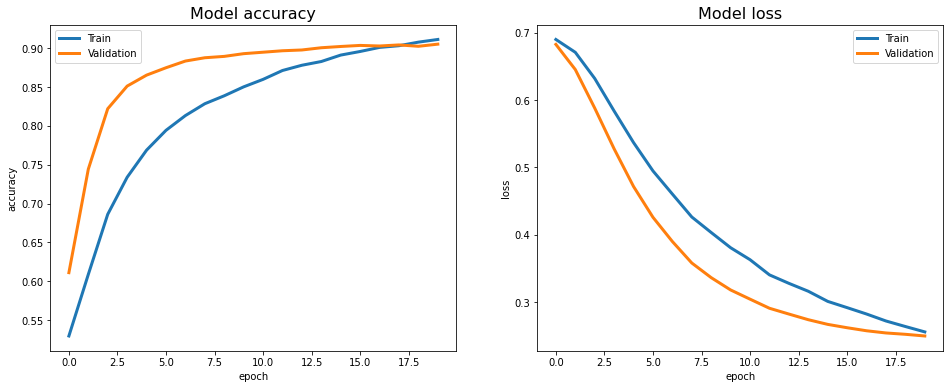

In [25]:
plot_history(results)